In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from typing import Tuple
from nptyping import Array
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

## Point Estimate

Point estimates are estimates of population parameters based on sample data.

**Population:** Number of orders at a website per hour. We will use a Poisson random variable as this is typically used to model the number of times an event happened in a time interval. However, we will combine two poisson distributions to create an interesting distribution.

**Sample:** Random choice of 500 orders per hour. Calculate point estimate of population mean, the sample mean.

In [2]:
np.random.seed(10)

orders_1 = stats.poisson.rvs(mu=40, size=200000)
orders_2 = stats.poisson.rvs(mu=10, size=150000)
orders = np.concatenate([orders_1, orders_2])
print(f"population mean: {orders.mean()}")
print("")

np.random.seed(10)
sample_sizes = [10, 50, 100, 200, 500, 1000, 3000, 10000, 20000]
for sample_size in sample_sizes:
    sample = np.random.choice(orders, size=sample_size)
    print(f"sample mean (sample={sample_size}): {sample.mean()}")

population mean: 27.145874285714285

sample mean (sample=10): 25.1
sample mean (sample=50): 23.18
sample mean (sample=100): 25.08
sample mean (sample=200): 27.995
sample mean (sample=500): 26.75
sample mean (sample=1000): 27.085
sample mean (sample=3000): 27.34
sample mean (sample=10000): 27.2043
sample mean (sample=20000): 27.42235


We expect the distribution of the sample to be of similar shape to that of the population. Therefore, we can assume that the the sample mean $\overline{x}$ should have the same value as population mean $\mu$. Usually, the point estimator becomes more accurate as the size of the sample increases.

## The Central Limit Theorem

In statistics we often assume that our data follows a gaussian distribution. Gaussian distributions have nice properties like being symmetric and having the majority of the data clustered within a few standard deviations of the mean. The real world often does not follow normal distributions, additionally a sample tends to follow the distribution of the population. This means a sample taken from a population that is not gaussian will also tend to be not gaussian.


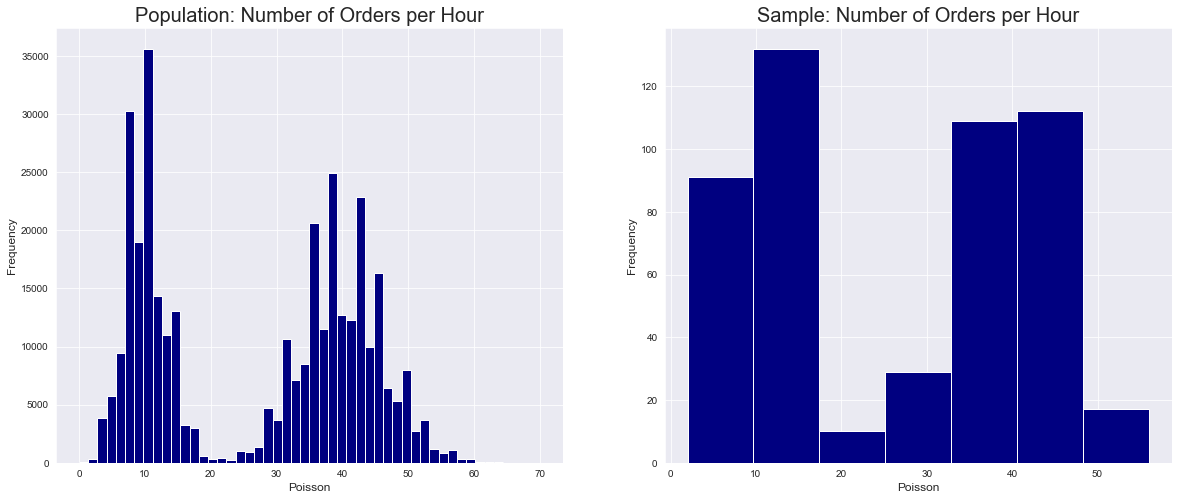

In [3]:
fig = plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)

sns.distplot(
    orders, 
    kde=False,
    hist_kws=dict(alpha=1),
    color="navy",
    ax=ax1
)

ax1.set_title("Population: Number of Orders per Hour", fontsize=20)
ax1.set_xlabel("Poisson", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)

ax2 = plt.subplot(1, 2, 2)

sample = np.random.choice(orders, size=500)

sns.distplot(
    sample ,
    kde=False,
    hist_kws=dict(alpha=1),
    color="navy",
    ax=ax2
)

ax2.set_title("Sample: Number of Orders per Hour", fontsize=20)
ax2.set_xlabel("Poisson", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)

plt.show()

The sample distribution resembles the underlying population distribution. This suggests that we can't apply techniques that assume a normal distribution.

The central limit theorem suggest that the distribution of many sample means, known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed.

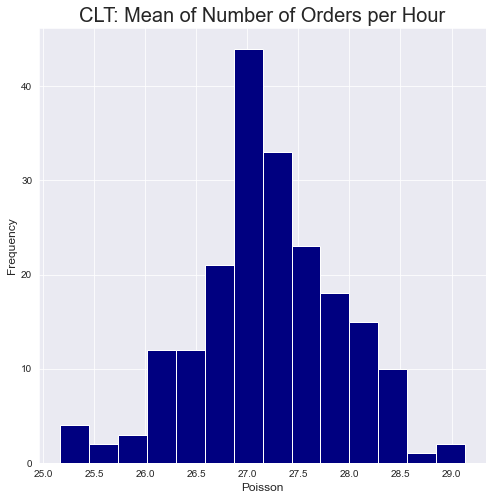

In [4]:
np.random.seed(10)

samples = 200
point_estimates_orders = [np.random.choice(orders, size = 500).mean()
                   for _ in range(samples)]

fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1)

sns.distplot(
    point_estimates_orders, 
    kde=False,
    hist_kws=dict(alpha=1),
    color="navy",
    ax=ax
)

ax.set_title("CLT: Mean of Number of Orders per Hour", fontsize=20)
ax.set_xlabel("Poisson", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)


plt.show()

The sampling distribution appears roughly normal. Additionally, the mean of the sampling distribution approaches the true population mean:

In [5]:
perc_difference = (orders.mean() - np.mean(point_estimates_orders))/orders.mean()

print(
    f"Percentage differance of point estimate to mean of population: {np.round(perc_difference, 3)}%"
)

Percentage differance of point estimate to mean of population: -0.002%


## Confidence Intervals

A point estimate can give us a rough approximation of a population parameter. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. 



$$ \begin{align} \text{Confidence Interval} = \text{Point Estimate } \pm \text{Margin of Error}\end{align} $$
$$ \begin{align} \text{Margin of Error = 'a few' Standard Errors}\end{align} $$
  
$$ \begin{align} \text{point estimate} \pm z * SE \end{align} $$
  
* $z$ is called the critical value and it corresponds to the confidence level that we chose. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations from the mean, so we could use 2 as the z-critical value for a 95% confidence interval
* Standard error for a point estimate is estimated from the data and computed using a formula
* The value $z * SE$ is called the margin of error

### One Proportion

**Assumptions**  
1) $n*\hat{p}=10$ and $n*1-\hat{p}=10$  
2) Random Sample
  
$$\text{Confidence Interval = } \text{point estimate} \pm z * \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

We can enforce a *conservative* confidence interval by setting $\hat{p}$ equal to 0.5 which will increase the interval.

$$\text{Confidence Interval = } \text{point estimate} \pm z * \sqrt{\frac{1}{2n}}$$

In [6]:
def confidence_interval_one_proportion(
    nobs: int,
    proportion: float,
    confidence: float = 0.975
) -> Tuple[float, float]:
    
    z = stats.norm.ppf(confidence)
    standard_error = np.sqrt((proportion * (1-proportion))/nobs)
    margin_of_error = z * standard_error
    
    lower_confidence_interval = proportion - margin_of_error
    upper_confidence_interval = proportion + margin_of_error
    
    return (lower_confidence_interval, upper_confidence_interval)

nobs = 659
proportion = 0.85

confidence_interval = confidence_interval_one_proportion(
    nobs=nobs, 
    proportion=proportion
)

print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (0.8227378265796143, 0.8772621734203857)


### Two Proportions

**Assumptions**  
1) $n_1*\hat{p_1}=10$ and $n_1*1-\hat{p_1}=10$ and $n_2*\hat{p_2}=10$ and $n_2*1-\hat{p_2}=10$  
2) Random Sample

$$\text{Confidence Interval = } (\hat{p_1} - \hat{p_2}) \pm z * \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1} + \frac{\hat{p_2}(1-\hat{p_2})}{n_2}}$$

In [7]:
def confidence_interval_two_proportions(
    nobs_1: int,
    proportion_1: float,
    nobs_2: int,
    proportion_2: float,
    confidence: float = 0.975
) -> Tuple[float, float]:
    
    z = stats.norm.ppf(confidence)
    standard_error_1 = np.sqrt((proportion_1*(1-proportion_1))/nobs_1)
    standard_error_2 = np.sqrt((proportion_2*(1-proportion_2))/nobs_2)
    standard_error_diff = np.sqrt(standard_error_1**2 + standard_error_2**2)
    
    margin_of_error = z * standard_error_diff
    proportion_difference = proportion_1 - proportion_2
    
    lower_confidence_interval = proportion_difference - margin_of_error
    upper_confidence_interval = proportion_difference + margin_of_error
    
    return (lower_confidence_interval, upper_confidence_interval)

nobs_1 = 2972
proportion_1 = 0.304845
nobs_2 = 2753
proportion_2 = 0.513258

confidence_interval = confidence_interval_two_proportions(
    nobs_1=nobs_1, 
    proportion_1=proportion_1,
    nobs_2=nobs_2,
    proportion_2=proportion_2
)

print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (-0.2333631069853917, -0.18346289301460833)


### One Mean

1) Population normal (or $n\geq25$ enforce CLT)  
2) Random Sample

$$ \overline{x} \pm t * \frac{s}{ \sqrt{n} }$$ , degrees of freedom: $n-1$



In [8]:
def confidence_interval_one_mean(
    nobs: int,
    mean: float,
    std: float,
    confidence: float = 0.975
) -> Tuple[float, float]:
    
    degrees_freedom = nobs-1
    t = stats.t.ppf(confidence, degrees_freedom)
    
    standard_error = std/np.sqrt(nobs)
    margin_of_error = t * standard_error
    
    lower_confidence_interval = mean - margin_of_error
    upper_confidence_interval = mean + margin_of_error
    
    return (lower_confidence_interval, upper_confidence_interval)

nobs = 25
mean = 82.48
std = 15.058552387264852


confidence_interval = confidence_interval_one_mean(
    nobs=nobs, 
    mean=mean, 
    std=std
)

print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (76.26413507754478, 88.69586492245523)


### Difference in Means for Paired Data

$$ \overline{x_d} \pm t * \frac{s_d}{ \sqrt{n} }$$ , degrees of freedom: $n-1$

In [9]:
url = "https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv"
paired_data = pd.read_csv(url)
paired_data["difference"] = paired_data["bp_before"] - paired_data["bp_after"]
display(paired_data.head(4))

nobs = paired_data.shape[0]
mean = paired_data["difference"].mean()
std = paired_data["difference"].std()

confidence_interval = confidence_interval_one_mean(
    nobs=nobs, 
    mean=mean, 
    std=std
)


print(f"Confidence Interval: {confidence_interval}")

,patient,sex,agegrp,bp_before,bp_after,difference
0,1,Male,30-45,143,153,-10
1,2,Male,30-45,163,170,-7
2,3,Male,30-45,153,168,-15
3,4,Male,30-45,153,142,11


Confidence Interval: (2.0705568567756942, 8.11277647655764)


### Difference in Means for Independent Groups

**Assumptions**  
1) Population normal (or $n_1\geq25$, $n_2\geq25$ enforce CLT)  
2) Random Sample

*Unpooled* $\sigma_1 \neq \sigma_2$:

$$ (\overline{x_1} - \overline{x_2}) \pm t * \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $$

, degrees of freedom: $\min(n_1-1,n_2-1)$ or Welch approximation

*Pooled* $\sigma_1 = \sigma_2$:

$$ (\overline{x_1} - \overline{x_2}) \pm t * \sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}*\sqrt{\frac{1}{n_1}+\frac{1}{n_2}} $$

, degrees of freedom: $n_1+n_2-2$

In [10]:
def confidence_intervals_two_means(
    nobs_1: int,
    mean_1: float,
    std_1: float,
    nobs_2: int,
    mean_2: float,
    std_2: float,
    unpooled: bool = True,
    confidence: float = 0.975
) -> Tuple[float, float]:
    

    if unpooled:
        degrees_freedom = np.min([nobs_1-1, nobs_2-1])
        t = stats.t.ppf(confidence, degrees_freedom)
        
        standard_error_1 = std_1/np.sqrt(nobs_1)
        standard_error_2 = std_2/np.sqrt(nobs_2)
        standard_error_diff = np.sqrt(standard_error_1**2 + standard_error_2**2)
        
        margin_of_error = t * standard_error_diff
    
    else:
        degrees_freedom = nobs_1 + nobs_2 - 2
        t = stats.t.ppf(confidence, degrees_freedom)
        
        margin_of_error = t \
        * np.sqrt(((nobs_1 - 1)*(std_1**2) + (nobs_2 - 1)*(std_2**2))/ (nobs_1 + nobs_2 - 2) ) \
        * np.sqrt(1/nobs_1 + 1/nobs_2)
        
        
    mean_difference = mean_1 - mean_2
        
    lower_confidence_interval = mean_difference - margin_of_error
    upper_confidence_interval = mean_difference + margin_of_error
        
    return (lower_confidence_interval, upper_confidence_interval) 
            
nobs_1 = 2976
mean_1 = 29.939946
std_1 = 7.753319
nobs_2 = 2759
mean_2 = 28.778072
std_2 = 6.252568
    
unpooled_confidence_intervals = confidence_intervals_two_means(
    nobs_1=nobs_1,
    mean_1=mean_1,
    std_1=std_1,
    nobs_2=nobs_2,
    mean_2=mean_2,
    std_2=std_2,
    unpooled=True
)

pooled_confidence_intervals = confidence_intervals_two_means(
    nobs_1=nobs_1,
    mean_1=mean_1,
    std_1=std_1,
    nobs_2=nobs_2,
    mean_2=mean_2,
    std_2=std_2,
    unpooled=False
)

print(f"unpooled_confidence_intervals: {unpooled_confidence_intervals}")
print(f"pooled_confidence_intervals: {pooled_confidence_intervals}")

unpooled_confidence_intervals: (0.798356871923686, 1.5253911280763088)
pooled_confidence_intervals: (0.7955138433444433, 1.5282341566555515)


## Confidence Interval Interpretation

Confidence interval with a p-value of 95% can be interpreted in the following way. 

If we repeat the study many times each time producing a new sample (of same size) from which 95% confidence interval is computed, then 95% of the confidence intervals are expected to have the population parameter. The simulation below illustrates this, as we observe that not all confidence intervals overlap the orange line which marks the true mean. 

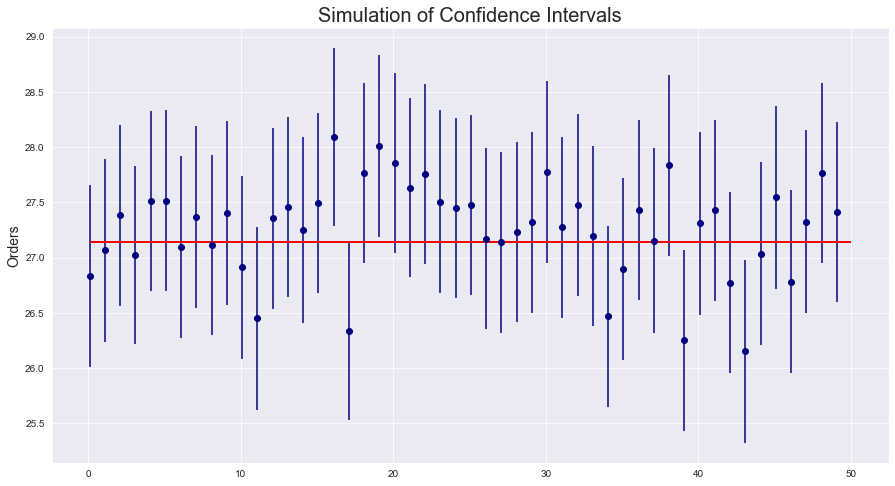

In [11]:
def simulate_confidence_intervals(
    array: Array, 
    sample_size: int,
    confidence: float = 0.95,
    seed: int = 10,
    simulations: int = 50
) -> pd.DataFrame:
    
    np.random.seed(seed)
    
    simulation = defaultdict(list)

    for i in range(0, simulations):
        simulation["sample_id"].append(i)
        sample = np.random.choice(orders, size = sample_size)
        sample_mean = sample.mean()
        simulation["sample_mean"].append(sample_mean)
    
        degrees_freedom = sample_size - 1
        t = stats.t.ppf(confidence, degrees_freedom)
        sample_std = sample.std()
        margin_error = t * (sample_std / np.sqrt(sample_size))
        condfidence_interval = sample_mean - margin_error, sample_mean + margin_error
        simulation["sample_confidence_interval"].append(condfidence_interval)

    return pd.DataFrame(simulation)

def visualise_confidence_interval_simulation(
    df: pd.DataFrame,
):
    fig = plt.figure(figsize=(15,8))
    ax = plt.subplot(1, 1, 1)
    ax.errorbar(
        x=np.arange(0.1, df.shape[0]), 
        y=df["sample_mean"], 
        yerr=[(top - bot) / 2 for top, bot in df["sample_confidence_interval"]], fmt = 'o',
        color="navy"
    )
    
    ax.hlines(
        xmin = 0.1,
        xmax = df.shape[0],
        y=orders.mean(),
        color="red",
        linewidth=2
    )
    
    ax.set_title("Simulation of Confidence Intervals", fontsize=20)
    ax.set_ylabel("Orders", fontsize= 14)
 
    
    

simulation_data = simulate_confidence_intervals(
    array=orders,
    confidence = 0.95,
    sample_size = 1000,
)

visualise_confidence_interval_simulation(df=simulation_data)